In [1]:
import numpy as np 
import quimb as qu
import quimb.tensor as qtn


In [ ]:
# Creation of the initial state as well
n = 16
H_i = qu.gen.operators.ham_ising(n,jz = -1, bx= 10000, sparse = True)
 
psi0 = qu.groundstate(H_i)
H = qu.ham_ising(n, jz=-1, bx=3,sparse = True)# now we expect a PM phase 
 

dims = [2] * n  # Define dims here

Z =qu.pauli('Z')
X = qu.pauli('X')
ZZ = Z & Z
XX = X & X

operators = [ZZ,XX]  

 

# Create a list of lists of operators, not considering periodic boundary condition here
operators_i1 = [[qu.ikron(op, dims, [i, i+1],sparse = True ) for op in operators] for i in range(0, n-1)]
 
operators = [Z, X]  
opreator4 = qu.ikron(Z, dims, [0,8],sparse = True)


# Create a list of lists of operators
operators_i2 = [[qu.ikron(op, dims, [i],sparse = True ) for op in operators] for i in range(n)]
 
def compute(t, pt):
    """Perform computation at time ``t`` with state ``pt``.
    """
    sz_expectations = []
    sx_expectations = []
    szz_expectations = []
    sxx_expectations = []
    sz01_expectations = []
    
    for operator_list in operators_i2:
        site_sz = qu.expec(pt, operator_list[0])  # Z expectation
        site_sx = qu.expec(pt, operator_list[1])  # X expectation
        sz_expectations.append(site_sz)
        sx_expectations.append(site_sx)
        
    for operator_list in operators_i1:
        site_szz = qu.expec(pt, operator_list[0])  # ZZ expectation
        site_sxx = qu.expec(pt, operator_list[1])  # XX expectation
        szz_expectations.append(site_szz)
        sxx_expectations.append(site_sxx)
    sz01_expectations = qu.expec(pt, opreator4)
    
    
    
    
    return t, sz_expectations, sx_expectations, szz_expectations, sxx_expectations,sz01_expectations


evo = qu.Evolution(psi0, H, progbar=True, compute=compute)
evo.update_to(20)

In [55]:
import matplotlib.pyplot as plt
ts,sz_expectations,sx_expectations,szz_expectations,sxx_expectations,sz01_expectations= zip(*evo.results)
 
# sites and bonds
js = np.arange(0, n)
bs = np.arange(0,n-1)

sz01 = np.array(sz01_expectations)  # Convert to a NumPy array
#sz01 = sz01.reshape(len(ts), n)  # Reshape sz to (number of timesteps, number of sites)
sx = np.array(sx_expectations)  # same
sx = sx.reshape(len(ts), n)  
sxx = np.array(sxx_expectations)  #same but now the shape will be (number of timesteps, number of bonds)
sxx = sxx.reshape(len(ts), n-1)  
szz = np.array(szz_expectations)  # same
szz = szz.reshape(len(ts), n-1)  

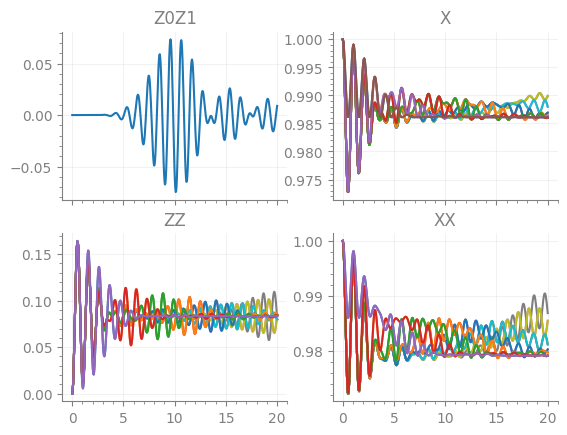

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

with plt.style.context(qu.NEUTRAL_STYLE):
    fig, axs = plt.subplots(2, 2, sharex=True)
    axs[0,0].plot(ts, np.real(sz01), '-');
    axs[0,0].set_title("Z0Z1")
    axs[0,1].plot(ts, np.real(sx), '-');
    axs[0,1].set_title("X")
    axs[1,0].plot(ts, np.real(szz), '-');
    axs[1,0].set_title("ZZ")
    axs[1,1].plot(ts, np.real(sxx), '-');
    axs[1,1].set_title("XX")

In [ ]:
import matplotlib.pyplot as plt
ts,sz_expectations,sx_expectations,szz_expectations,sxx_expectations,sz01_expectations= zip(*evo.results)
 
# sites and bonds
js = np.arange(0, n)
bs = np.arange(0,n-1)

sz = np.array(sz_expectations)  # Convert to a NumPy array
sz = sz.reshape(len(ts), n)  # Reshape sz to (number of timesteps, number of sites)
sx = np.array(sx_expectations)  # same
sx = sx.reshape(len(ts), n)  
sxx = np.array(sxx_expectations)  #same but now the shape will be (number of timesteps, number of bonds)
sxx = sxx.reshape(len(ts), n-1)  
szz = np.array(szz_expectations)  # same
szz = szz.reshape(len(ts), n-1)  

with plt.style.context(qu.NEUTRAL_STYLE):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))
    
    # Plot Z-Magnetization
    im1 = ax1.pcolormesh(js, ts, np.real(sz), vmax=0,vmin=1, cmap='RdYlBu')
    fig.colorbar(im1, ax=ax1)
    ax1.set_title('<Z>')
    ax1.set_xlabel('Site')
    ax1.set_ylabel('Time [ $Jt$ ]')
    
    # Plot X-Magnetization
    im2 = ax2.pcolormesh(js, ts, np.real(sx),vmax=0,vmin=1,  cmap='RdYlBu')
    fig.colorbar(im2, ax=ax2)
    ax2.set_title('<X>')
    ax2.set_xlabel('Site')
    ax2.set_ylabel('Time [ $Jt$ ]')
    
    im3 = ax3.pcolormesh(bs, ts, np.real(szz),vmax=0,vmin=1  ,cmap='RdYlBu')
    fig.colorbar(im3, ax=ax3)
    ax3.set_title('<ZZ>')
    ax3.set_xlabel('Bond')
    ax3.set_ylabel('Time [ $Jt$ ]')
    
    im4 = ax4.pcolormesh(bs, ts, np.real(sxx) ,vmax=0,vmin=1 , cmap='RdYlBu')
    fig.colorbar(im4, ax=ax4)
    ax4.set_title('<XX>')
    ax4.set_xlabel('Bond')
    ax4.set_ylabel('Time [ $Jt$ ]')
    
 
    
plt.tight_layout()  # Ensures subplots do not overlap
 
plt.show()

In [63]:
# Creation of the initial state as well
n = 16
H_i = qu.gen.operators.ham_ising(n,jz = -1, bx= 10000, sparse = True)
 
psi0 = qu.groundstate(H_i)
H = qu.ham_ising(n, jz=-1, bx=3,sparse = True)# now we expect a PM phase 
 

dims = [2] * n  # Define dims here

Z =qu.pauli('Z')
X = qu.pauli('X')
ZZ = Z & Z
XX = X & X

 
operators = [qu.ikron(Z, dims, [0, i], sparse=True) for i in range(1, n)]

# Define the initial state psi0
# Assuming you have your initial state defined here as psi0

def compute(t, pt):
    """Perform computation at time ``t`` with state ``pt``."""
    expectations = [qu.expec(pt, op) for op in operators]
    return t, expectations

# Create a list of lists of operators



evo = qu.Evolution(psi0, H, progbar=True, compute=compute)
evo.update_to(20)

100%|#################################################################################| 100/100 [00:19<00:00,  5.06%/s]


In [65]:
import matplotlib.pyplot as plt
ts, expectations= zip(*evo.results)

cz = np.array(expectations)  # Convert to a NumPy array
cz = cz.reshape(len(ts), n-1)  # Reshape sz to (number of timesteps, number of sites)

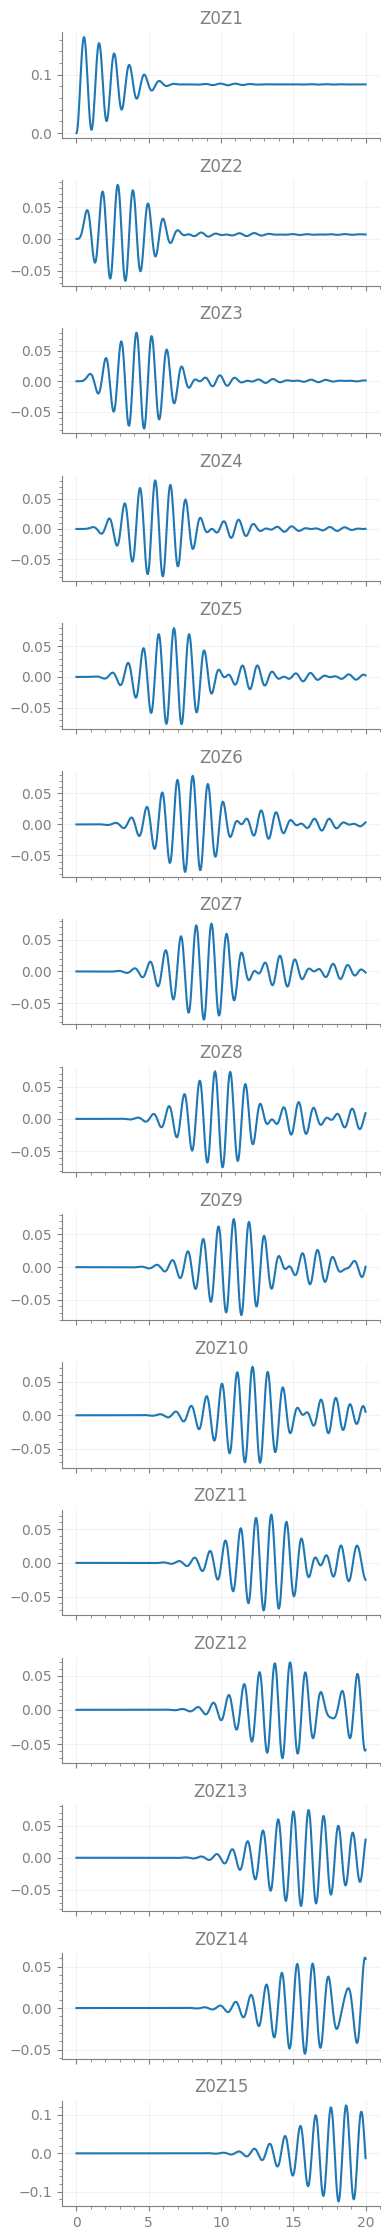

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

with plt.style.context(qu.NEUTRAL_STYLE):
    num_rows = n - 1  # Number of rows equals the number of correlations
    
    fig, axs = plt.subplots(num_rows, 1, sharex=True, figsize=(4, 1.5 * num_rows))  # Adjust the figsize here
    
    for i in range(n - 1):
        operator_label = f"Z0Z{i+1}"
        
        axs[i].plot(ts, np.real(cz[:, i]), '-')
        axs[i].set_title(operator_label)
    
    # Adjust layout
    plt.tight_layout()
    plt.savefig("czz.png")
    # Show the plot
    plt.show()


